In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Cleaning

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

filename = '/content/drive/My Drive/DataScience/sales_predictions.csv'
salesDF = pd.read_csv(filename)
salesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [41]:
salesDF.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [73]:
#Converting objects to strings where appropriate
salesDF['Item_Identifier'] = salesDF['Item_Identifier'].astype(str)
salesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
salesDF.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
salesDF.groupby(['Outlet_Type', 'Outlet_Size'])['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Size  Outlet_Size
Grocery Store      Small        Small           528
Supermarket Type1  High         High            932
                   Medium       Medium          930
                   Small        Small          1860
Supermarket Type2  Medium       Medium          928
Supermarket Type3  Medium       Medium          935
Name: Outlet_Size, dtype: int64

In [32]:
salesDF[salesDF['Outlet_Size'].isnull()]['Outlet_Type'].value_counts()

Supermarket Type1    1855
Name: Outlet_Type, dtype: int64

In [74]:
outletFilt = salesDF['Outlet_Size'].isnull()
groceryFilt = salesDF['Outlet_Type'] == 'Grocery Store'
weightFilt = salesDF['Item_Weight'].isnull()

In [31]:
#all grocery stores in the data are small so I have decided to replace the null values with 'Small'
salesDF.loc[groceryFilt & outletFilt, 'Outlet_Size'] = 'Small'

In [35]:
salesDF[salesDF['Outlet_Size'].isnull()]['Outlet_Identifier'].value_counts()

OUT045    929
OUT017    926
Name: Outlet_Identifier, dtype: int64

In [44]:
out045 = salesDF['Outlet_Identifier'] == 'OUT045'
out017 = salesDF['Outlet_Identifier'] == 'OUT017'

In [ ]:
salesDF.loc[out017,:]

In [ ]:
salesDF.loc[out045,:]

In [43]:
salesDF.groupby(['Outlet_Location_Type', 'Outlet_Size'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Size  Outlet_Size
Tier 1                Medium       Medium          930
                      Small        Small          1458
Tier 2                Small        Small           930
Tier 3                High         High            932
                      Medium       Medium         1863
                      Small        Small           555
Name: Outlet_Size, dtype: int64

In [56]:
salesDF.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].mean()

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

In [58]:
salesDF.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1789.097354
Name: Item_Outlet_Sales, dtype: float64

In [60]:
salesDF.loc[out045,:]['Item_Outlet_Sales'].mean()

2192.3847976318607

In [64]:
salesDF.loc[out017,:]['Item_Outlet_Sales'].mean()

2340.67526349892

In [70]:
#Out017 has average item sales that are in line with other high sizes
salesDF.loc[out017, 'Outlet_Size'] = 'High'

In [72]:
#Out045 has average sales that are in line with other high sizes
salesDF.loc[out045, 'Outlet_Size'] = 'High'

In [82]:
salesDF.groupby(['Item_Type', 'Item_Weight'])['Item_Weight'].mean()

Item_Type      Item_Weight
Baking Goods   4.880           4.880
               4.920           4.920
               5.260           5.260
               5.425           5.425
               5.440           5.440
                               ...  
Starchy Foods  18.250         18.250
               19.200         19.200
               20.500         20.500
               20.850         20.850
               21.200         21.200
Name: Item_Weight, Length: 1181, dtype: float64

In [89]:
salesDF.groupby(['Item_Identifier', 'Item_Weight'])['Item_Weight'].value_counts()

Item_Identifier  Item_Weight  Item_Weight
DRA12            11.600       11.600         6
DRA24            19.350       19.350         5
DRA59            8.270        8.270          6
DRB01            7.390        7.390          2
DRB13            6.115        6.115          5
                                            ..
NCZ30            6.590        6.590          6
NCZ41            19.850       19.850         5
NCZ42            10.500       10.500         5
NCZ53            9.600        9.600          4
NCZ54            14.650       14.650         5
Name: Item_Weight, Length: 1555, dtype: int64

In [93]:
items = salesDF.loc[~weightFilt, 'Item_Identifier']

In [103]:
Tier1Filt = salesDF['Outlet_Location_Type'] == 'Tier 1'
Tier2Filt = salesDF['Outlet_Location_Type'] == 'Tier 2'

Tier1 = salesDF.loc[Tier1Filt, :]
Tier2 = salesDF.loc[Tier2Filt, :]
Tier3 = salesDF.loc[~Tier1Filt & ~Tier2Filt, :]

<BarContainer object of 8523 artists>

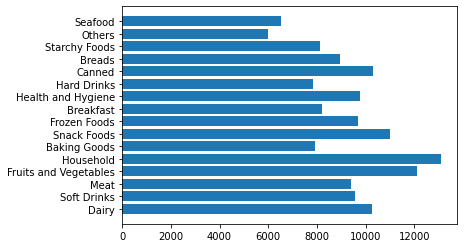

In [113]:
plt.barh(salesDF['Item_Type'], salesDF['Item_Outlet_Sales'])




<BarContainer object of 2388 artists>

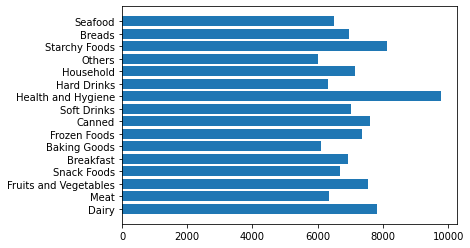

In [117]:
plt.barh(Tier1['Item_Type'], Tier1['Item_Outlet_Sales'])